# K-means
In this notebook, we'll implement the K-means algorithm, and use it on a sample dataset from the course graded lab.  
The code here are based on my own implementations in the graded lab, organized and rewritten to be more succinct and clear.

## Tools

In [78]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [79]:
## Load dataset
X = np.genfromtxt('kmeans_data.csv', delimiter=',')

In [80]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


## K-means Algorithm

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # 1. Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # 2. Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```

## Implementation

Our implementation of the K-means algorithm will consist of the following functions:
- `find_closest_centroids`: assign each data point to the closest centroid.
- `compute_centroids`: compute means of each cluster based on centroid assignments
- `kMeans_init_centroids`: randomly initialize K cluster centroids
- `run_kMeans`: run K-means iteratively

In [81]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        idx[i] = np.argmin(np.linalg.norm((X[i, :] - centroids), axis=1))
     
    return idx

In [82]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0 2 1]


**Expected Output**:
<table>
  <tr>
    <td> <b>First three elements in idx are<b></td>
    <td> [0 2 1] </td> 
  </tr>
</table>

In [83]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    centroids = np.zeros((K, X.shape[1]))
    
    for k in range(K):
        idx_ck = idx == k
        centroids[k, :] = np.mean(X[idx_ck, :], axis=0)
    
    return centroids

In [84]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


**Expected Output**:

2.42830111 3.15792418

5.81350331 2.63365645

7.11938687 3.6166844 

In [85]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    idx_choice = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[idx_choice, :]

    return centroids

In [86]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    hist_centroids = [centroids]  # Store the progression of cluster centroids
    
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration {:d}/{:d}".format(i, max_iters-1))

        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)

        hist_centroids.append(centroids)

    if plot_progress:
        plt.figure(figsize=(8, 6))  # Make figure
        colors = ['r', 'g', 'b']
        
        # Plot each cluster in different color
        for k in range(K):  
            msk = idx == k
            plt.scatter(X[msk, 0], X[msk, 1], marker='o', facecolors='none', edgecolors=colors[k])
        
        # Plot the progress of cluster centroids
        for k in range(K):
            x_coords = [c[k, 0] for c in hist_centroids]
            y_coords = [c[k, 1] for c in hist_centroids]
            plt.plot(x_coords, y_coords, marker='x', color='k')

    return centroids, idx

## K-means on the sample dataset

Let's run the k-means algorithm on the sample dataset loaded above. First, we'll specify the initial centroids.

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


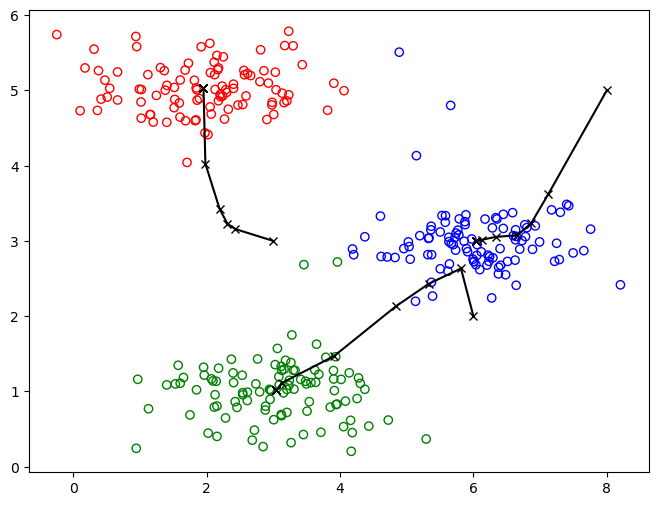

In [90]:
# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

Now we'll run the algorithm on randomly initalized centroids. You can run the following cell repeatedly to see different outcomes.

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


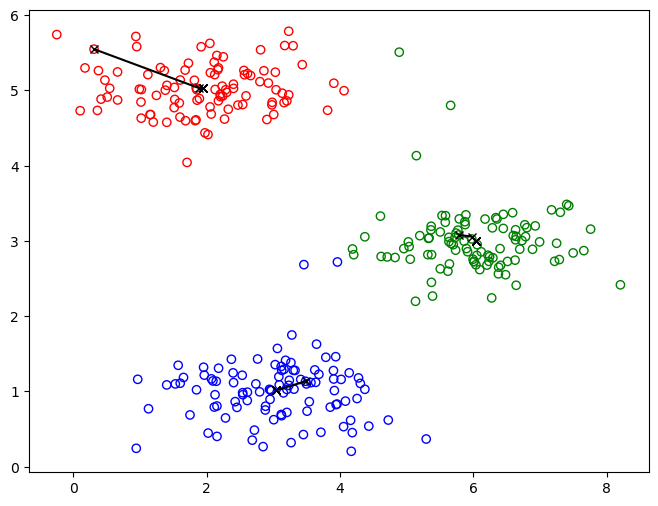

In [88]:
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)